读取保存的水位-流量数据

In [91]:
import pandas as pd

riverData = pd.read_excel("data.xlsx")
xOri = list(riverData['水位'])
yOri = list(riverData['流量'])
Z0 = min(xOri)

浮动多项式法进行拟合

        3         2
0.7773 x + 11.28 x + 822.7 x + 3112


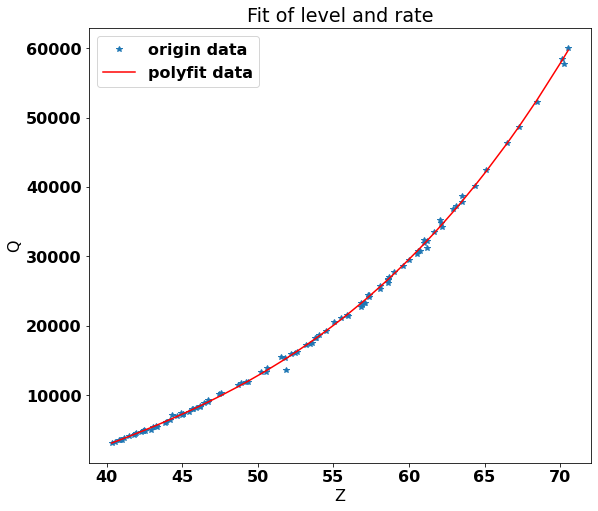

In [92]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

# 准备数据,将(x,y)坐标点进行输入
x = np.array(xOri)
y = np.array(yOri)
x = x-Z0
# 使用polyfit方法来拟合,并选择多项式,这里先使用2次方程
z1 = np.polyfit(x, y, 3)
# 使用poly1d方法获得多项式系数,按照阶数由高到低排列
p1 = np.poly1d(z1)
# 在屏幕上打印拟合多项式
print(p1)
# 求对应x的各项拟合函数值
fx = p1(x)
# 绘制坐标系散点数据及拟合曲线图
plt.rcParams["figure.figsize"] = (9, 8)
Z = x+Z0
plot1 = plt.plot(Z, y, '*', label='origin data')
plot2 = plt.plot(Z, fx, 'r', label='polyfit data')
plt.xlabel('Z')
plt.ylabel('Q')
plt.legend(loc=2)  # 指定legend的位置,类似象限的位置
plt.title('Fit of level and rate')
plt.savefig('Fit.png',dpi=200)

符号检验

In [93]:
judgeSig = fx-y
SigP = 0
for thisZ in judgeSig:
    if thisZ>0:
        SigP+=1
print("测试点数",len(judgeSig),"正值个数",SigP)
SigU = (abs(SigP-len(judgeSig)*0.5)-0.5)/0.5/np.sqrt(len(judgeSig))
print("符号检验值(显著性水平5%时u<1.96)",SigU)

测试点数 103 正值个数 53
符号检验值(显著性水平5%时u<1.96) 0.19706585563285864


适线检验

In [94]:
judgeK = 0
for i in range(1,len(fx)):
    if (fx[i]-y[i])*(fx[i-1]-y[i-1])>0:
        judgeK +=1
u2 = (abs(judgeK-0.5*(len(fx)-1))-0.5)/0.5/np.sqrt(len(fx)-1)
print("异偏个数",judgeK)
print("适线检验值(显著性水平5%时u<1.64)",u2)

异偏个数 58
适线检验值(显著性水平5%时u<1.64) 1.2871918058696767


偏离数值检验

In [96]:
pMean = np.mean(judgeSig)
P = []
for i in range(0,len(fx)):
    P.append((y[i]-fx[i])/fx[i])
P = np.array(P)
Sp = np.sqrt(np.sum((P-pMean)*(P-pMean))/(len(fx)-1))
SpMean = Sp/np.sqrt(len(fx))
t = pMean/SpMean
print("偏离数值检验值(显著性水平10%时t<1.94)",abs(t))

偏离数值检验值(显著性水平10%时t<1.94) 3.838282922420311e-09
